In [1]:
%pip install matplotlib
%pip install seaborn
%pip install nltk
%pip install textblob
%pip install gensim
%pip install wordcloud
%pip install networkx
%pip install spacy
%pip install scikit-learn
%pip install pyLDAvis
%pip install pyLDAvis.gensim
%pip install pyLDAvis.gensim_models
%pip install pyLDAvis
%pip install pyLDAvis.gensim_models
%pip install pyLDAvis.gensim

import pandas as pd
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from sklearn.feature_extraction.text import CountVectorizer
#from sklearn.decomposition import LatentDirichletAllocation
#from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import pdist
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from gensim.matutils import sparse2full

import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

import networkx as nx
from gensim import corpora, models
from gensim.models.coherencemodel import CoherenceModel
import spacy

from collections import Counter

from gensim.corpora import Dictionary
from gensim.models import LdaModel

from wordcloud import WordCloud


# Unmount the drive
#drive.flush_and_unmount()
#print('Drive unmounted')





Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: spacy in c:\users\mateu\anaconda3\lib\site-packages (3.8.4)
  Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl.metadata (60 kB)
Using cached numpy-2.2.6-cp312-cp312-win_amd64.whl (12.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.6 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.6 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.6 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.2.6 which is incompatible.


Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
thinc 8.3.6 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim_models (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim_models


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim_models (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim_models
ERROR: Could not find a version that satisfies the requirement pyLDAvis.gensim (from versions: none)
ERROR: No matching distribution found for pyLDAvis.gensim


Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mateu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mateu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\mateu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


# **Load and Preprocess Data**

In [2]:
name = "PUBG"
# File path
#file_path = '/content/drive/My Drive/reviews_with_metadata.csv'
# Step 1: Load Data

data = pd.read_csv('Scrapping/PUBG_cleaned_reviews.csv')

# Step 2: Clean `Hours Played`
data['Hours Played'] = data['Hours Played'].replace(',', '', regex=True).astype(float)

# Step 3: Drop Rows with Missing Reviews
data = data.dropna(subset=['Review'])

# Step 4: Define Text Preprocessing Function
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Replace special characters with a space
    text = re.sub(r"[^\w\s]", " ", text)  # Keep only words and spaces
    # Replace numeric characters with a space
    text = re.sub(r"\d+", " ", text)
    # Remove non-ASCII and non-Cyrillic characters
    text = re.sub(r"[^\x00-\x7F\u0400-\u04FF\s]", " ", text)
    # Remove multiple consecutive spaces
    text = re.sub(r"\s+", " ", text).strip()
    # Tokenize text
    tokens = word_tokenize(text)
    # Load stopwords and add custom stopwords
    custom_stopwords = set(stopwords.words('english'))
    custom_stopwords.update(['o', 'etc', 'would', 'could', 'us', 'the', 'to', 'of', 'in', 'it', 'and', 'this', 'that', 'for'])  # Add custom meaningless words
    # Remove stopwords and short tokens or stand-alone letters
    tokens = [word for word in tokens if word not in custom_stopwords and len(word) > 1]
    # Filter out stand-alone letters explicitly
    tokens = [word for word in tokens if len(word) > 1 or word.isnumeric()]
    # Join tokens back into a single string
    return ' '.join(tokens)


# Step 5: Apply Text Preprocessing
data['Processed_Review'] = data['Review'].apply(preprocess_text)

# Step 6: Drop Empty Processed Reviews
data = data[data['Processed_Review'].str.strip() != ""]

# Step 7: Convert `Date` Column to Datetime Format
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')
data.to_csv(f'{name}_cleaned_processed_reviews.csv')
# Display the first few rows of the processed data
data.head()


,Game,Date,Review,Hours Played,Recommendation,Helpful Votes,Processed_Review
0,578080,2020-06-25,"After almost 1000 hours of playing, it's time ...",1326.7,Not Recommended,1320,almost hours playing time voice thoughts owned...
1,578080,2020-01-17,"After 2 years and 2,200 hours of gameplay, I w...",2808.4,Not Recommended,1216,years hours gameplay permanently banned pubg w...
2,578080,2020-04-26,"3 years and 3,500 hours of gameplay and this g...",6186.4,Not Recommended,709,years hours gameplay game still joke clunky gl...
3,578080,2021-04-22,"AS OF 2024, Reporting system is shockers. TEAM...",2737.2,Not Recommended,3835,reporting system shockers teaming public thing...
4,578080,2021-12-10,This game will be free from January 12 2022!,358.6,Recommended,1884,game free january


# **Text Tokenization and Preparation**

In [3]:
from collections import Counter
from nltk.tokenize import word_tokenize

# Step 8: Tokenize Processed Reviews
data['Tokenized_Review'] = data['Processed_Review'].apply(word_tokenize)

# Step 9: Build Vocabulary
def build_vocab_and_filter(data, min_word_freq=2):
    # Flatten all tokenized reviews to get all tokens
    all_tokens = [token for tokens in data['Tokenized_Review'] for token in tokens]
    vocab_counter = Counter(all_tokens)
    # Filter words by minimum frequency
    vocab = {word for word, count in vocab_counter.items() if count >= min_word_freq}
    return vocab

# Apply vocabulary filtering
min_word_freq = 2
vocab = build_vocab_and_filter(data, min_word_freq)

# Step 10: Filter Tokenized Reviews
data['Filtered_Review'] = data['Tokenized_Review'].apply(
    lambda tokens: [word for word in tokens if word in vocab]
)

# Step 11: Reconstruct Cleaned Documents
documents = data['Filtered_Review'].apply(lambda tokens: ' '.join(tokens))

# Step 12: Prepare Metadata
metadata = data.drop(columns=['Review', 'Processed_Review', 'Tokenized_Review', 'Filtered_Review'])

# Step 13: Save Outputs (Optional)
documents.to_csv(f'processed_{name}_documents.csv', index=False, header=['Documents'])
metadata.to_csv(f'processed_{name}_metadata.csv', index=False)

# Step 14: Display Samples
print("Sample Processed Documents:")
print(documents.head())

print("\nVocabulary Size:", len(vocab))
print("Sample Vocabulary:", list(vocab)[:10])

print("\nSample Metadata:")
print(metadata.head())


Sample Processed Documents:
0    almost hours playing time voice thoughts owned...
1    years hours gameplay permanently banned pubg w...
2    years hours gameplay game still joke clunky gl...
3    reporting system teaming public thing radar ha...
4                                    game free january
Name: Filtered_Review, dtype: object

Vocabulary Size: 3647
Sample Vocabulary: ['specs', 'soon', 'worst', 'mention', 'keeps', 'object', 'scam', 'sore', 'food', 'exactly']

Sample Metadata:
     Game       Date  Hours Played   Recommendation  Helpful Votes
0  578080 2020-06-25        1326.7  Not Recommended           1320
1  578080 2020-01-17        2808.4  Not Recommended           1216
2  578080 2020-04-26        6186.4  Not Recommended            709
3  578080 2021-04-22        2737.2  Not Recommended           3835
4  578080 2021-12-10         358.6      Recommended           1884


# **Sentiment Analysis**
Building World Clouds
Extracted key terms for each topic using labelTopics.
Visualized top words.
without date included

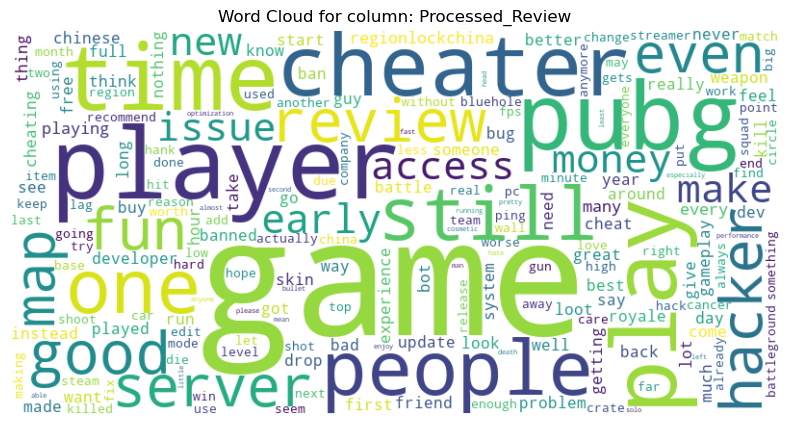

In [5]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

data = pd.read_csv('PUBG_cleaned_processed_reviews.csv')# Select the column with text (e.g., 'review_text')
text_column = 'Processed_Review'
text_data = data[text_column].dropna().astype(str).str.cat(sep=' ')

# Generate the word cloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    max_words=200,
    collocations=False  # Avoid duplicate phrases
).generate(text_data)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(f'Word Cloud for column: {text_column}')
plt.show()


PUBG becomes free to play

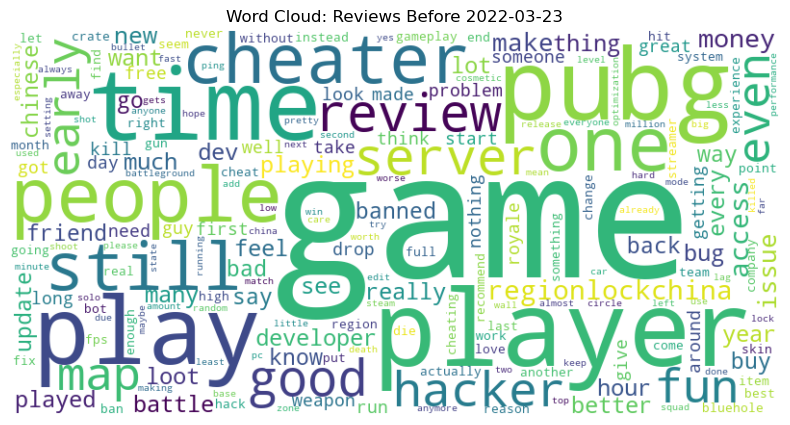

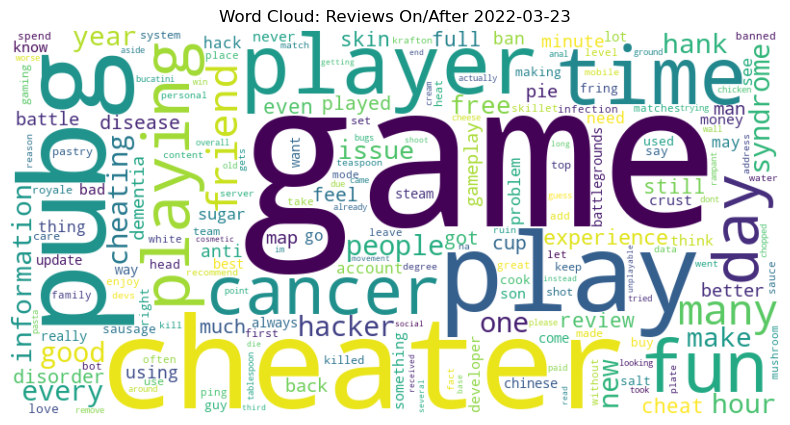

In [7]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Load data

date = '2022-03-23'
# Convert 'date' column to datetime (adjust the column name if needed)
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Split data into two periods
date_split = pd.Timestamp(date)
before_df = data[data['Date'] < date_split]
after_df = data[data['Date'] >= date_split]

text_column = 'Processed_Review'

def generate_wordcloud(text, title):
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        max_words=200,
        collocations=False
    ).generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Prepare text for each period
text_before = before_df[text_column].dropna().astype(str).str.cat(sep=' ')
text_after = after_df[text_column].dropna().astype(str).str.cat(sep=' ')

# Generate and show word clouds
generate_wordcloud(text_before, f'Word Cloud: Reviews Before {date}')
generate_wordcloud(text_after, f'Word Cloud: Reviews On/After {date}')


# **Word Frequencies**
without date included

          word  frequency
18        game       1810
8         pubg        350
20        like        323
32        play        313
44         get        301
3         time        280
164    players        247
202     people        244
273   cheaters        234
55         one        222
84       still        221
13        good        214
590        fun        206
53      review        189
367      games        178
101       even        177
1010     early        167
52     hackers        163
169      money        158
77         new        157


C:\Users\mateu\AppData\Local\Temp\ipykernel_7584\2262072920.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=freq_df, palette='viridis')


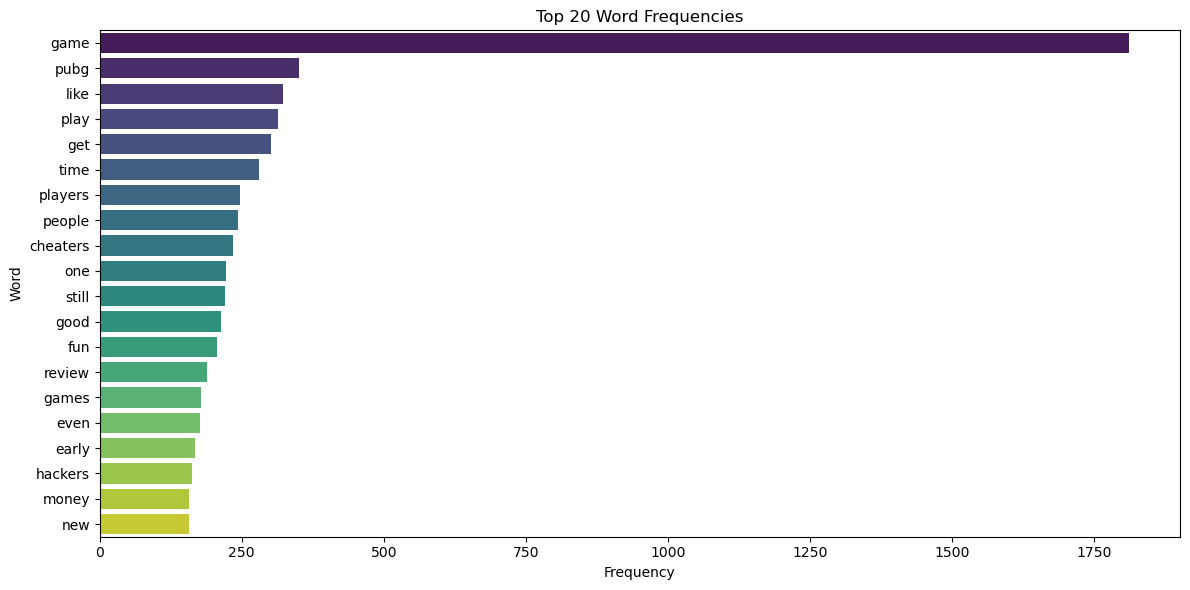

In [8]:
import pandas as pd
from collections import Counter
import re

# Select the column with text (e.g., 'review_text')
text_column = 'Processed_Review'  # Change to your actual column name
# Combine all text into one large string
all_text = ' '.join(data[text_column].dropna().astype(str).tolist())

# Basic cleaning: remove punctuation and make lowercase
cleaned_text = re.sub(r'[^\w\s]', '', all_text.lower())

# Tokenize
words = cleaned_text.split()

# Count word frequencies
word_freq = Counter(words)

# Convert to DataFrame and show top 20
freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
freq_df = freq_df.sort_values(by='frequency', ascending=False)

print(freq_df.head(20))
freq_df = freq_df.head(20)

plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', data=freq_df, palette='viridis')
plt.title('Top 20 Word Frequencies')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()


Before and after update

C:\Users\mateu\AppData\Local\Temp\ipykernel_7584\449507687.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=freq_df, palette='viridis')


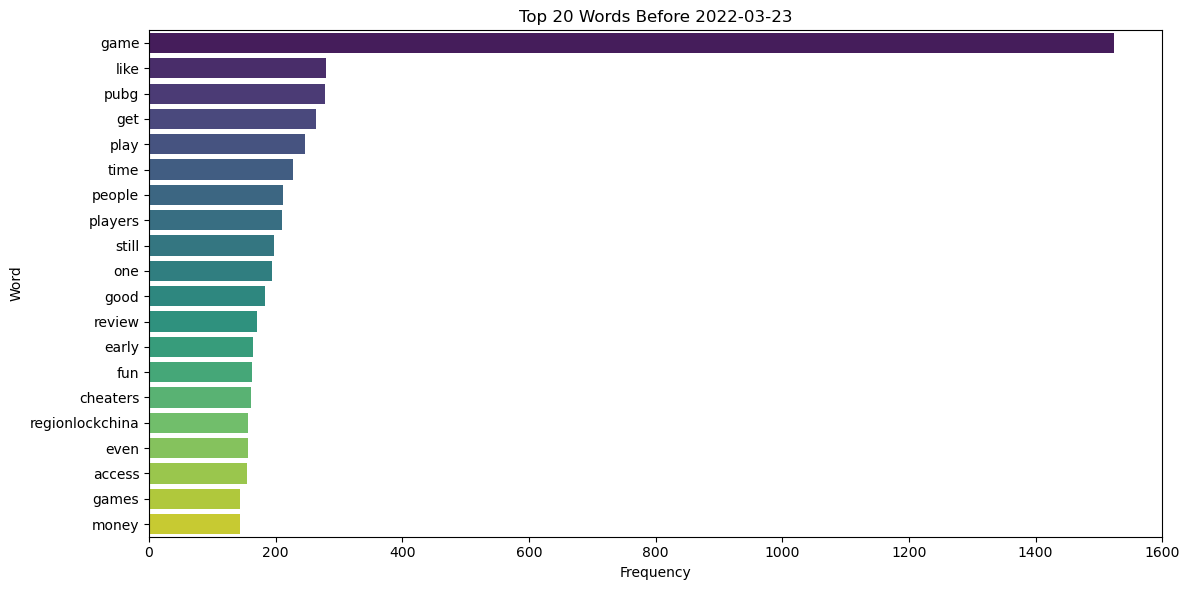

C:\Users\mateu\AppData\Local\Temp\ipykernel_7584\449507687.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='frequency', y='word', data=freq_df, palette='viridis')


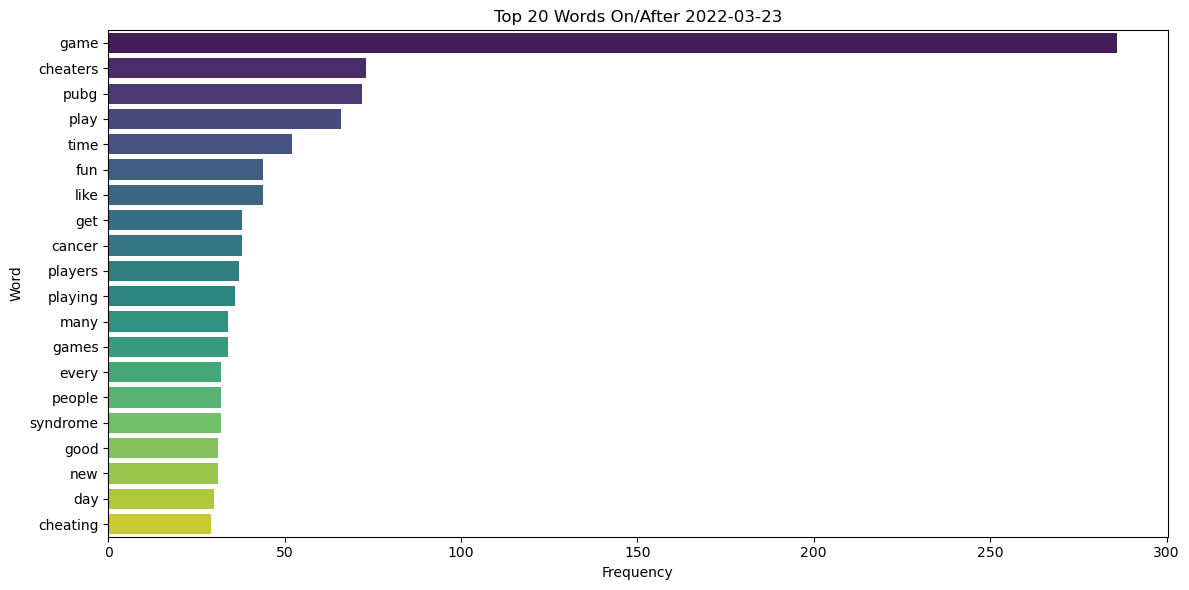

In [9]:
import pandas as pd
from collections import Counter
import re
import matplotlib.pyplot as plt
import seaborn as sns


# Convert date column to datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')  # replace 'date' with your date column name

# Define date cutoff
cutoff_date = pd.Timestamp('2022-03-23')

# Function to get top word frequencies and plot
def plot_top_words(df, text_col, title):
    all_text = ' '.join(df[text_col].dropna().astype(str).tolist())
    cleaned_text = re.sub(r'[^\w\s]', '', all_text.lower())
    words = cleaned_text.split()
    word_freq = Counter(words)
    freq_df = pd.DataFrame(word_freq.items(), columns=['word', 'frequency'])
    freq_df = freq_df.sort_values(by='frequency', ascending=False).head(20)

    plt.figure(figsize=(12, 6))
    sns.barplot(x='frequency', y='word', data=freq_df, palette='viridis')
    plt.title(title)
    plt.xlabel('Frequency')
    plt.ylabel('Word')
    plt.tight_layout()
    plt.show()

# Filter data by date
before_df = data[data['Date'] < cutoff_date]
after_df = data[data['Date'] >= cutoff_date]

# Column with text
text_column = 'Processed_Review'  # Change if needed

# Plot word frequencies for each period
plot_top_words(before_df, text_column, f'Top 20 Words Before {date}')
plot_top_words(after_df, text_column, f'Top 20 Words On/After {date}')



# **Step 5: Sentiment Score and Sentiment Category Distribution**

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\mateu\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


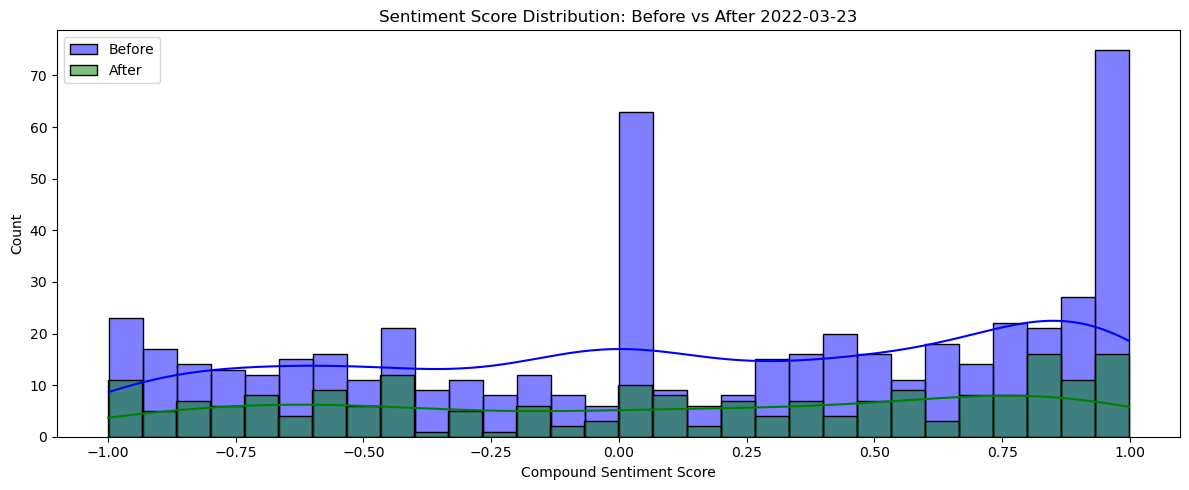

C:\Users\mateu\AppData\Local\Temp\ipykernel_7584\1941680044.py:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=before_df, ax=axs[0], palette='Blues')
C:\Users\mateu\AppData\Local\Temp\ipykernel_7584\1941680044.py:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=after_df, ax=axs[1], palette='Greens')


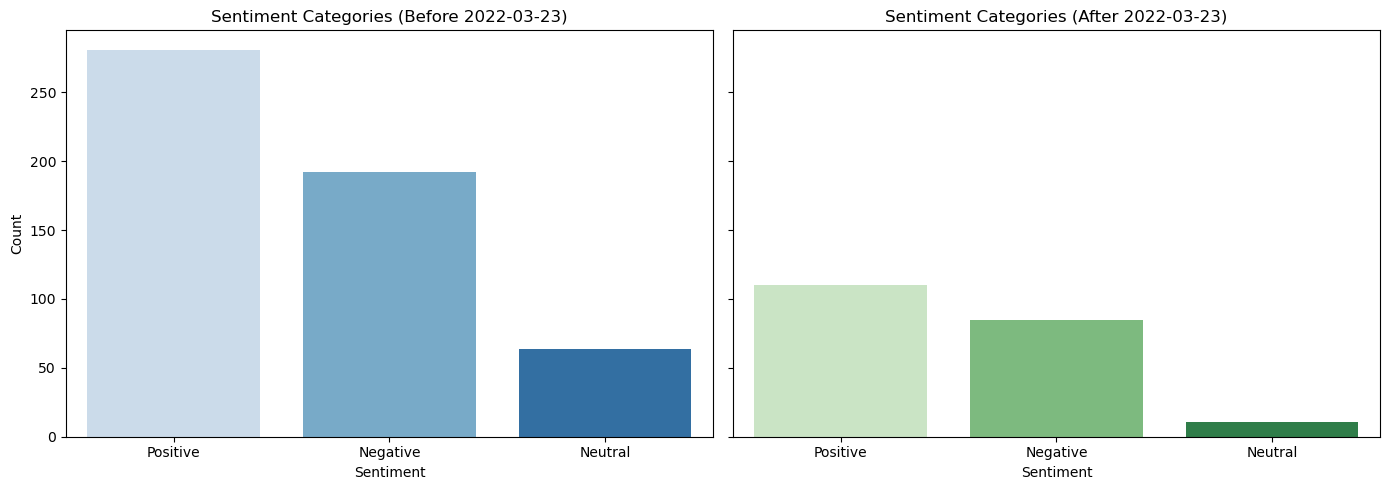

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.sentiment import SentimentIntensityAnalyzer
import nltk

# Download VADER if not done already
nltk.download('vader_lexicon')


# Ensure date is datetime
data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

# Drop missing reviews
data = data.dropna(subset=['Processed_Review'])

# Initialize VADER
sia = SentimentIntensityAnalyzer()

# Compute sentiment scores
data['sentiment_score'] = data['Processed_Review'].astype(str).apply(lambda x: sia.polarity_scores(x)['compound'])

# Categorize into sentiment classes
def get_sentiment_category(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

data['sentiment_category'] = data['sentiment_score'].apply(get_sentiment_category)

# Split before and after
cutoff = pd.Timestamp(date)
before_df = data[data['Date'] < cutoff]
after_df = data[data['Date'] >= cutoff]

# ---------- PLOT 1: Sentiment Score Distribution ----------
plt.figure(figsize=(12, 5))
sns.histplot(before_df['sentiment_score'], color='blue', kde=True, label='Before', bins=30)
sns.histplot(after_df['sentiment_score'], color='green', kde=True, label='After', bins=30)
plt.title(f'Sentiment Score Distribution: Before vs After {date}')
plt.xlabel('Compound Sentiment Score')
plt.legend()
plt.tight_layout()
plt.show()

# ---------- PLOT 2: Sentiment Category Counts ----------
fig, axs = plt.subplots(1, 2, figsize=(14, 5), sharey=True)

sns.countplot(x='sentiment_category', data=before_df, ax=axs[0], palette='Blues')
axs[0].set_title(f'Sentiment Categories (Before {date})')
axs[0].set_xlabel('Sentiment')
axs[0].set_ylabel('Count')

sns.countplot(x='sentiment_category', data=after_df, ax=axs[1], palette='Greens')
axs[1].set_title(f'Sentiment Categories (After {date})')
axs[1].set_xlabel('Sentiment')

plt.tight_layout()
plt.show()


# **Step Sentiment vs user recommendation**
check if the sentiment alligns with whether the user recommendet the game or not.
Reccomended column is 2 variable one sentiment is a 3 variable one so we should not use a barplot like this one we should use a box plot to analyze sentiment score distribution by recommendation first, maybe that way we can assume that "Recommended" value can be also interpreted as neutral. Making sentiment score a 2 categorical variable.

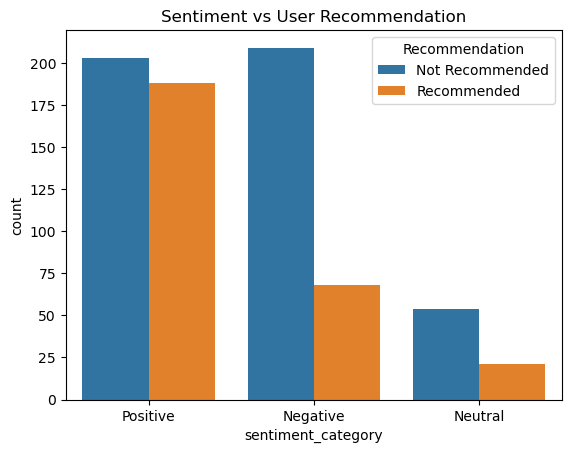

Number of NaN values in 'Recommendation': 0

Unique values and their counts in 'Recommendation':
Recommendation
Not Recommended    466
Recommended        277
Name: count, dtype: int64


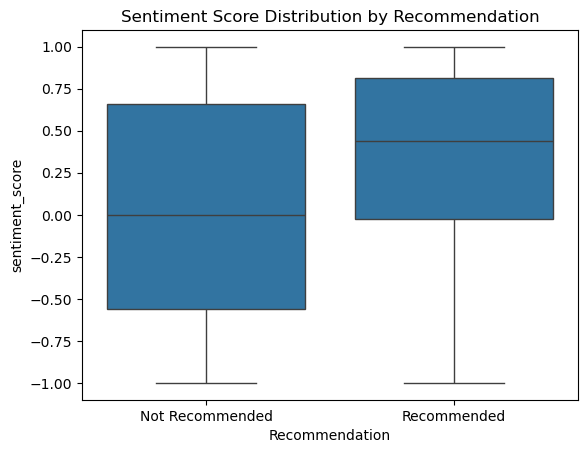

In [11]:
# Compare VADER sentiment to user's recommendation
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='sentiment_category', hue='Recommendation', data=data)
plt.title('Sentiment vs User Recommendation')
plt.show()


# Check for NaN values
nan_count = data['Recommendation'].isna().sum()
print(f"Number of NaN values in 'Recommendation': {nan_count}")

# Show unique values and their counts
print("\nUnique values and their counts in 'Recommendation':")
print(data['Recommendation'].value_counts(dropna=False))  # includes NaNs

pd.crosstab(data['sentiment_category'], data['Recommendation'])
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=data, x='Recommendation', y='sentiment_score')
plt.title("Sentiment Score Distribution by Recommendation")
plt.show()


## **Analysis of Interactions Between Sentiment Score, Recommendation, Hours Played, and Helpful Votes**

This analysis leverages metadata such as "Hours Played" and "Helpful Votes" to enhance sentiment analysis and recommendation evaluation by providing contextual information to the review content.

### Objective of the Analysis

The goal is to investigate the interactions between the following variables:
- Sentiment Score (text sentiment)
- Recommendation (game recommendation: positive/negative)
- Hours Played (amount of time spent in the game)
- Helpful Votes (number of users who found the review helpful)

### Rationale for Using Metadata

- "Hours Played" serves as an indicator of user engagement. A high number of hours combined with negative sentiment may suggest valid, constructive criticism.
- "Helpful Votes" reflect the perceived value or quality of a review. A high number of helpful votes may indicate a more influential or trusted opinion.

### Scope of the Analysis

The following research questions will be addressed:

- Do highly engaged users (with many hours played) express more polarized sentiments?
- Are reviews with few helpful votes more neutral or noisy in nature?
- Do "Not Recommended" reviews with a high number of helpful votes form separate clusters compared to other reviews?


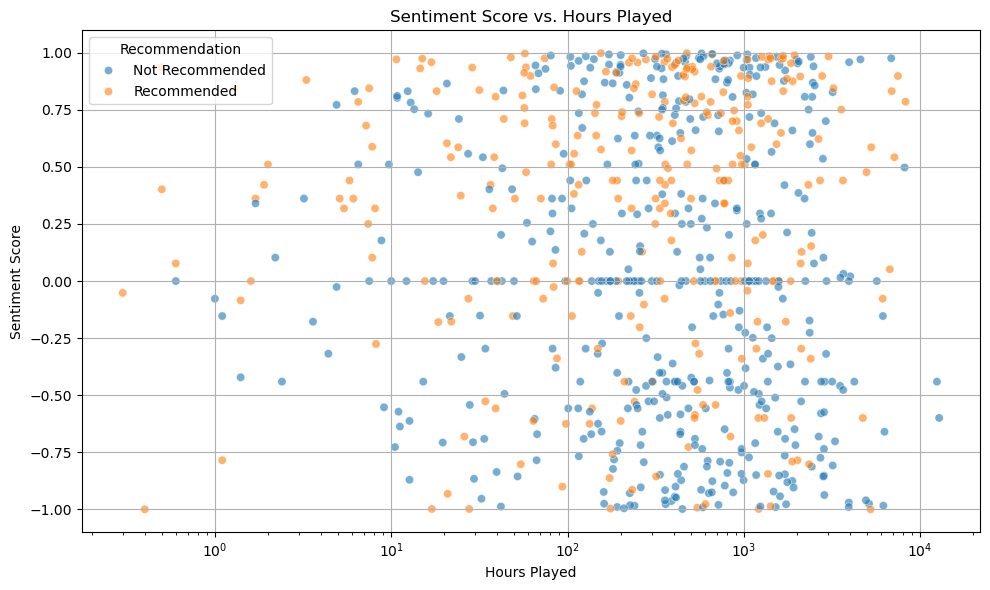

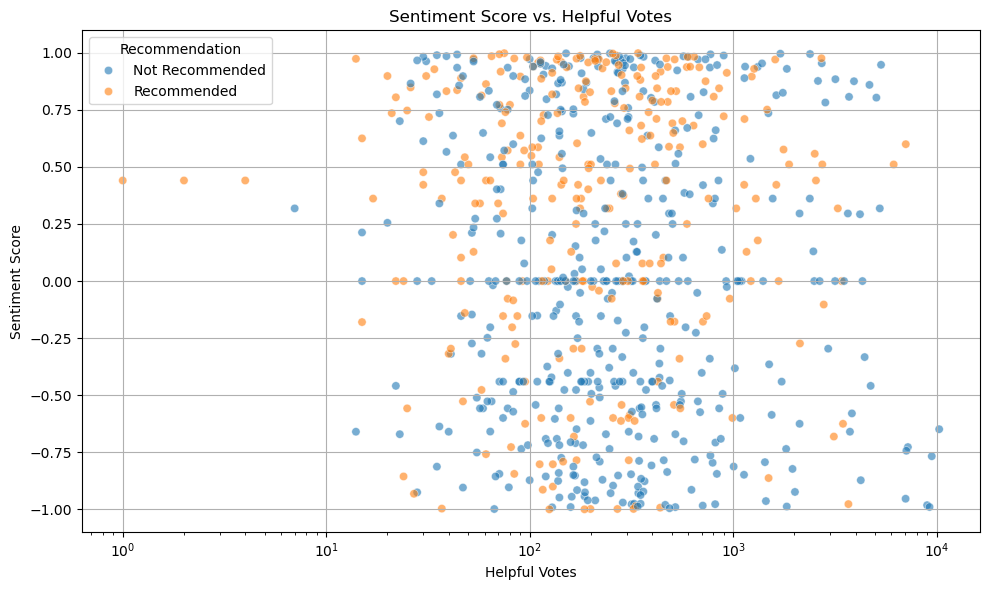

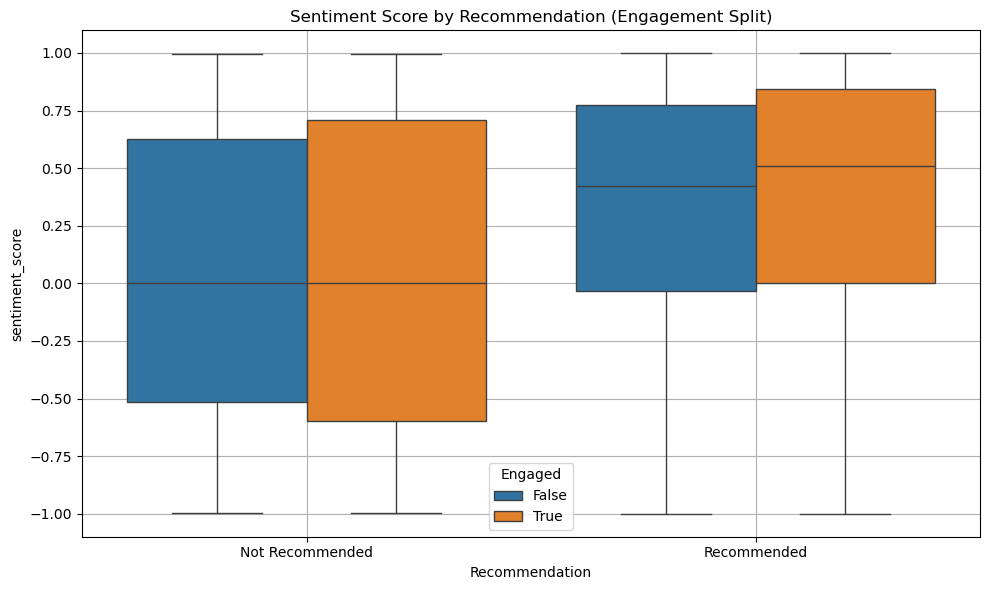

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = data.copy()

# Ensure types
df['Date'] = pd.to_datetime(df['Date'])
df['Hours Played'] = pd.to_numeric(df['Hours Played'], errors='coerce')
df['Helpful Votes'] = pd.to_numeric(df['Helpful Votes'], errors='coerce')
df['sentiment_score'] = pd.to_numeric(df['sentiment_score'], errors='coerce')  # assuming you created this column

# Drop rows with missing critical values
df_clean = df.dropna(subset=['sentiment_score', 'Hours Played', 'Helpful Votes', 'Recommendation'])

# 1. Sentiment vs Hours Played
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Hours Played', y='sentiment_score', hue='Recommendation', alpha=0.6)
plt.title('Sentiment Score vs. Hours Played')
plt.xlabel('Hours Played')
plt.ylabel('Sentiment Score')
plt.xscale('log')  # if hours are skewed
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Sentiment vs Helpful Votes
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_clean, x='Helpful Votes', y='sentiment_score', hue='Recommendation', alpha=0.6)
plt.title('Sentiment Score vs. Helpful Votes')
plt.xlabel('Helpful Votes')
plt.ylabel('Sentiment Score')
plt.xscale('log')  # optional: scale to handle outliers
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Boxplot: Sentiment by Recommendation + engagement
df_clean['Engaged'] = df_clean['Hours Played'] > df_clean['Hours Played'].median()

plt.figure(figsize=(10, 6))
sns.boxplot(data=df_clean, x='Recommendation', y='sentiment_score', hue='Engaged')
plt.title('Sentiment Score by Recommendation (Engagement Split)')
plt.grid(True)
plt.tight_layout()
plt.show()


<Axes: xlabel='sentiment_category', ylabel='Hours Played'>

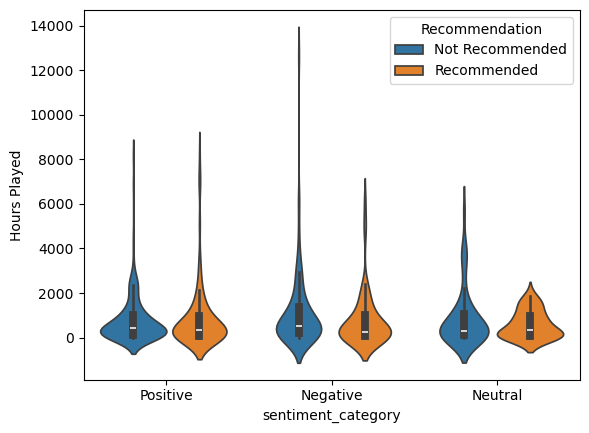

In [13]:
sns.violinplot(data=df_clean, x='sentiment_category', y='Hours Played', hue='Recommendation')
